In [1]:
#Import Librarires

#matrix algebra and dataframe
import numpy as np
import pandas as pd

#Visulization
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preparation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#Dimensionality reduction
from sklearn.decomposition import PCA

#Outlier Detection
from sklearn.neighbors import LocalOutlierFactor

#Clustering Algorithms
from sklearn.cluster import KMeans

#metrics
from sklearn.metrics import silhouette_score

#Pipeline, list tuples (list of transformations in a sequence order with final estimator)
from sklearn.pipeline import Pipeline

In [2]:
"""Below line is source for this dataset, which have online shoppers intentions with various features,
it seems to be imbalance dataset for classification purpose.
Here in this notebook only continuous variable considered for segmentation purpose 

https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

"""
df=pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
#check dimensions of dataframe
df.shape

(12330, 18)

In [5]:
#check for any null values for each feature
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
#check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [7]:
#segregate categorical and continous variables columns into the list, "Speciaday" variable considerd as continuos variable
cat_var=df.select_dtypes(include=['int64','object','bool']).columns.tolist()

cont_var=df.select_dtypes(include=['float64']).columns.tolist()

C:\Users\Ramani\Anaconda3\envs\MLDS\lib\site-packages\numpy\lib\histograms.py:592: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)
C:\Users\Ramani\Anaconda3\envs\MLDS\lib\site-packages\numpy\lib\histograms.py:708: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)
C:\Users\Ramani\Anaconda3\envs\MLDS\lib\site-packages\numpy\lib\histograms.py:592: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)
C:\Users\Ramani\Anaconda3\envs\MLDS\lib\site-packages\numpy\lib\histograms.py:708: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


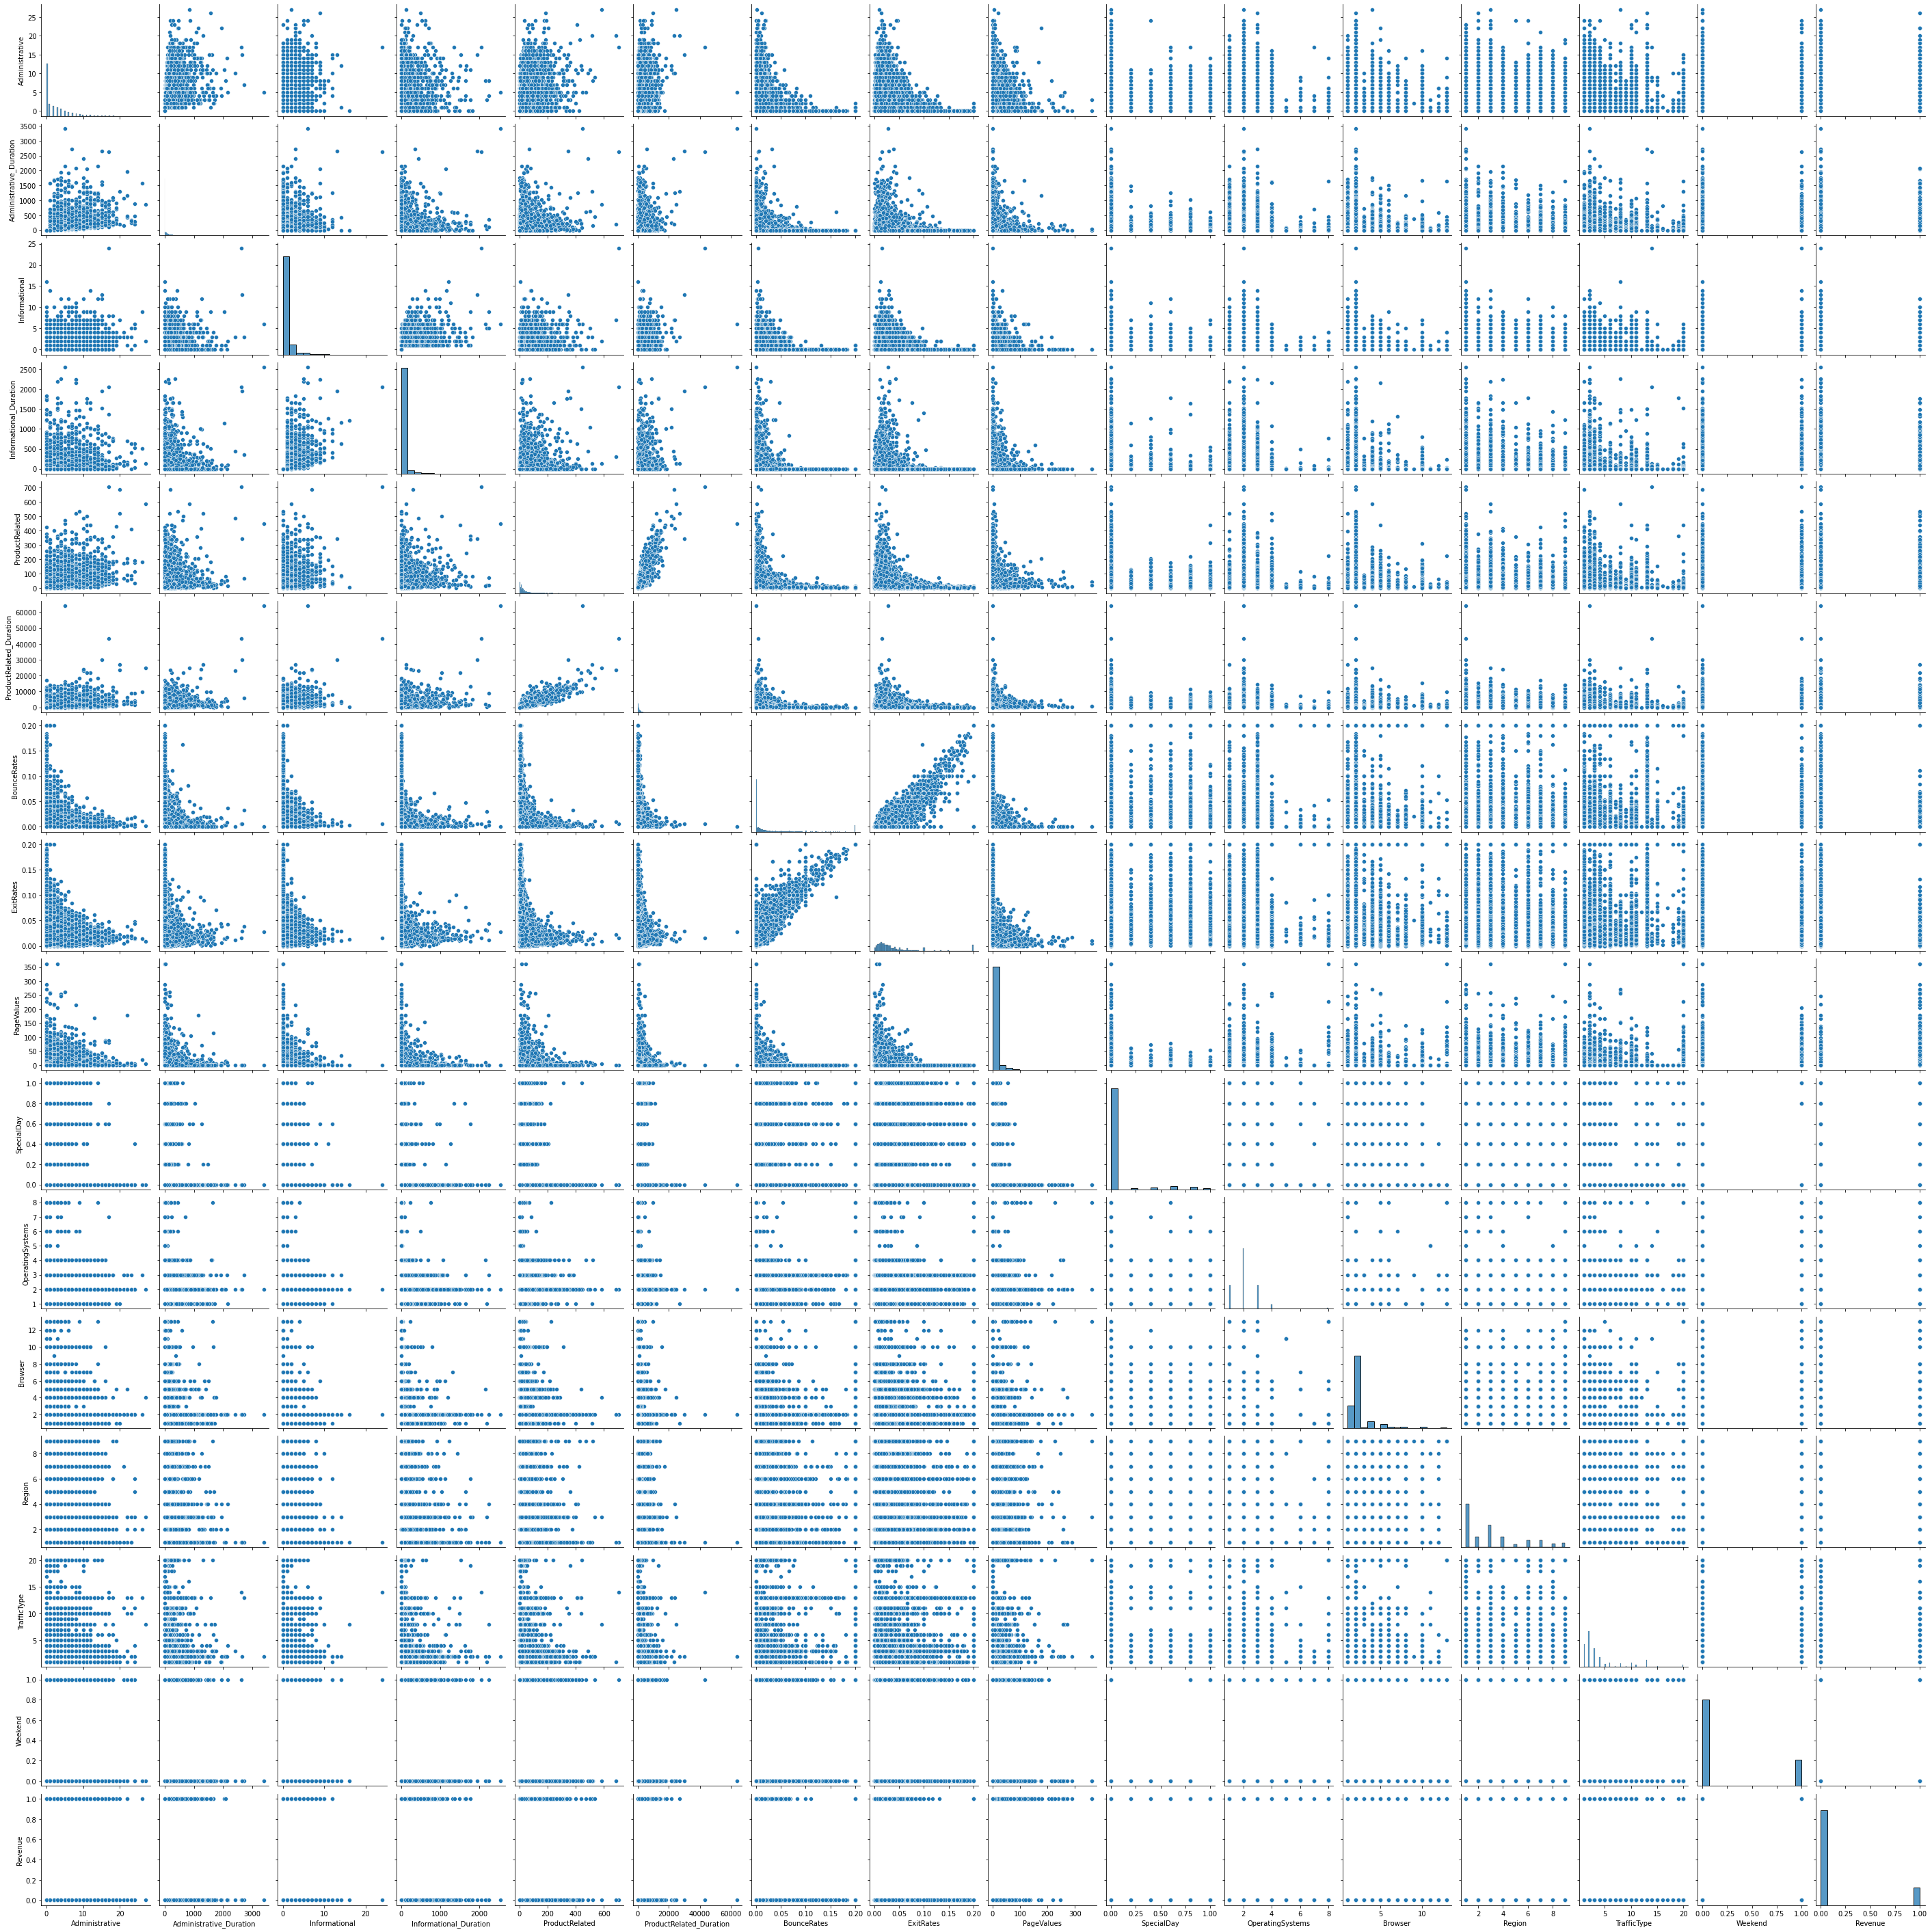

In [8]:
#plot all variables against each other
sns.pairplot(data=df);

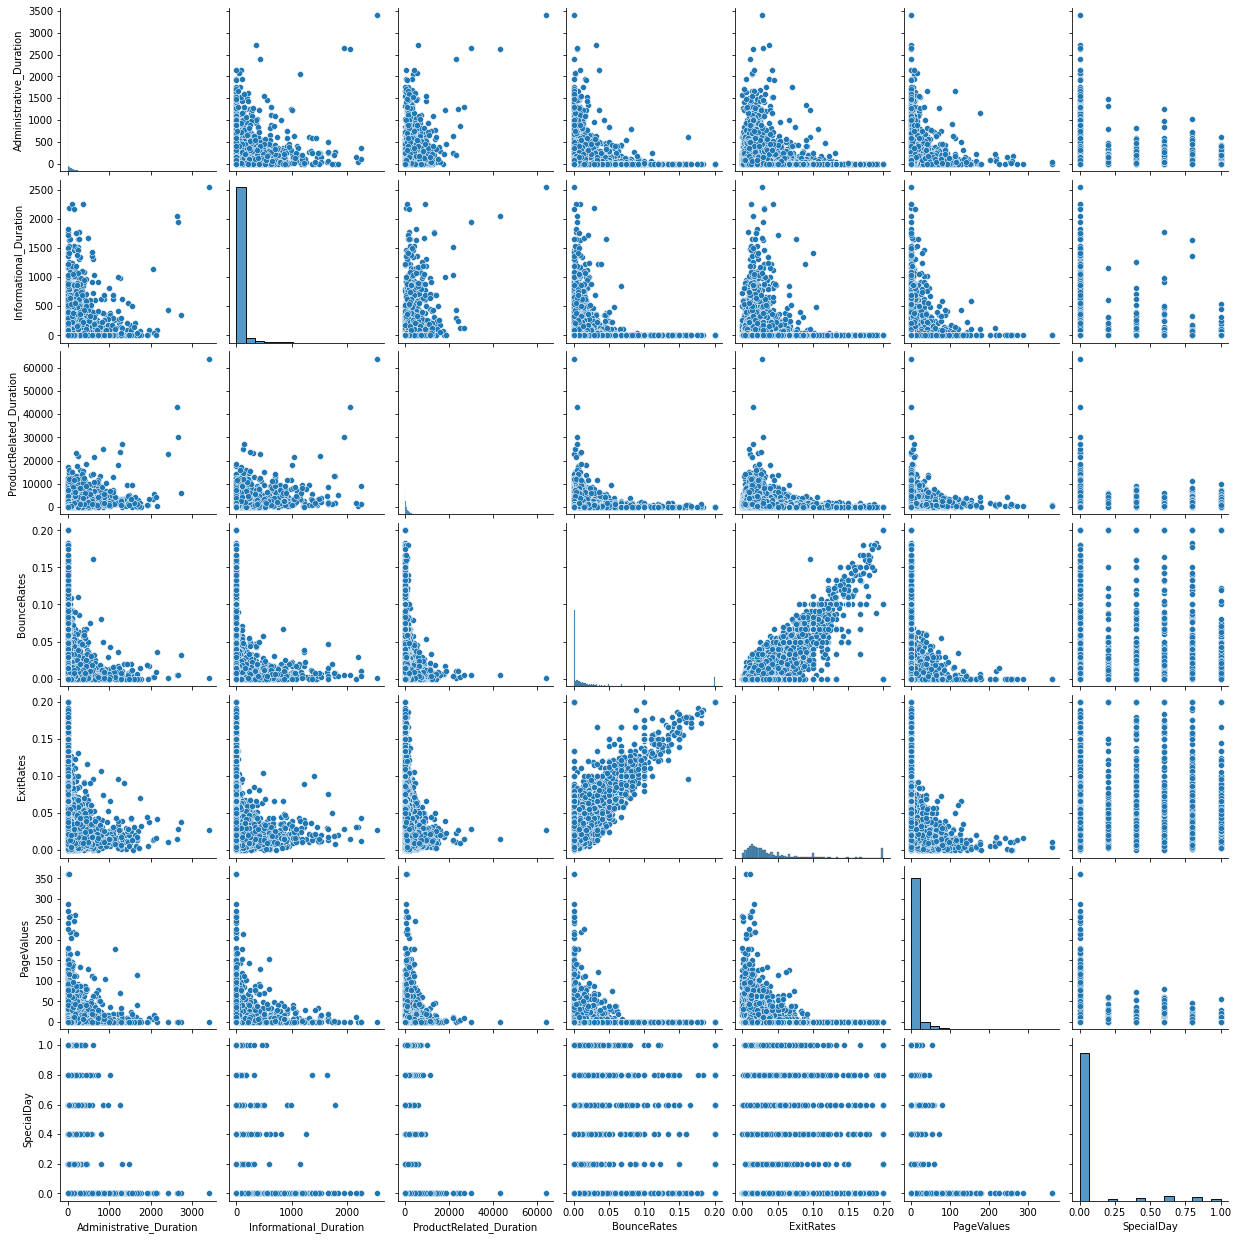

In [9]:
#plot continuous variable against each other
sns.pairplot(data=df[cont_var]);

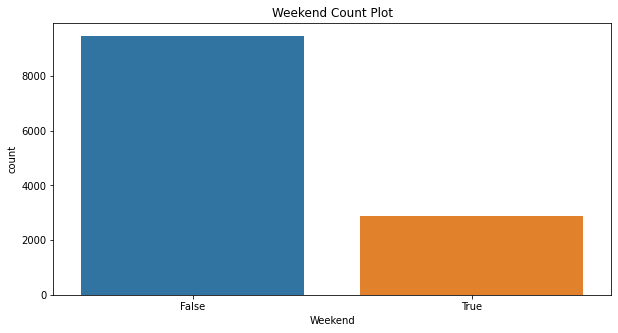

In [10]:
#plot counts for weenkend variable 
plt.figure(figsize=(10,5));
sns.countplot(x="Weekend",data=df);
plt.title("Weekend Count Plot");

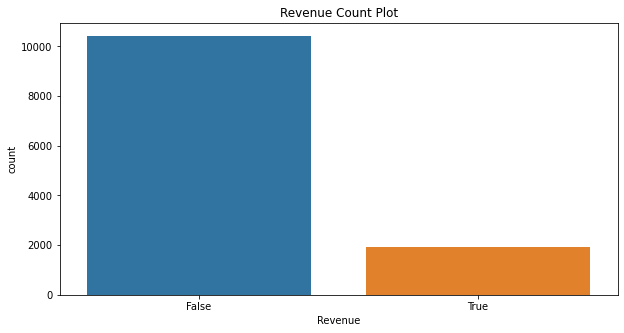

In [11]:
"""plot counts for Revenue variable (acutually this one is the target varable for classification task,
it is clearly indicate that imbalanced dataset)"""
plt.figure(figsize=(10,5));
sns.countplot(x="Revenue",data=df);
plt.title("Revenue Count Plot");

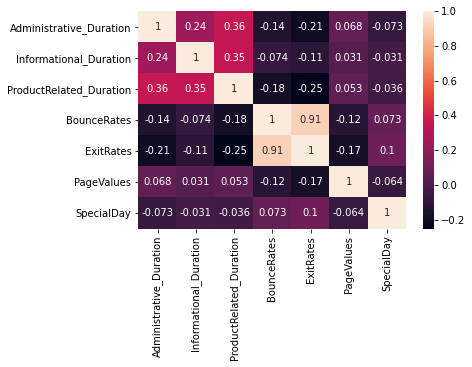

In [12]:
#correlation plot
sns.heatmap(df[cont_var].corr(),annot=True);

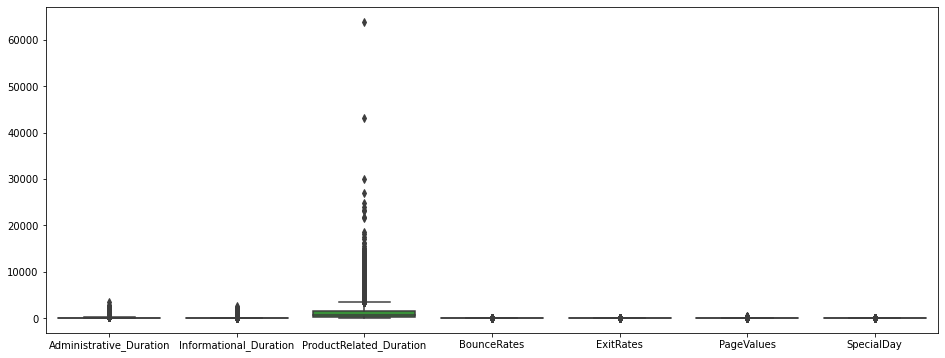

In [13]:
#check for data spread and outliers visulisations
plt.figure(figsize=(16,6))
sns.boxplot(data=df[cont_var]);

In [14]:
#ProductRelated_Duration has extreame ouliers
df[cont_var].describe()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,80.818611,34.472398,1194.746220,0.022191,0.043073,5.889258,0.061427
std,176.779107,140.749294,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,7.500000,0.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,93.256250,0.000000,1464.157213,0.016813,0.050000,0.000000,0.000000
max,3398.750000,2549.375000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [15]:
#using LocalOutlierFactor will remove extream outliers
outliers=LocalOutlierFactor(n_neighbors=20)
outliers=outliers.fit_predict(df[cont_var].values)
np.unique(outliers,return_counts=True)
df=df[outliers==1]
df.reset_index(inplace=True)
df.shape

(11182, 19)

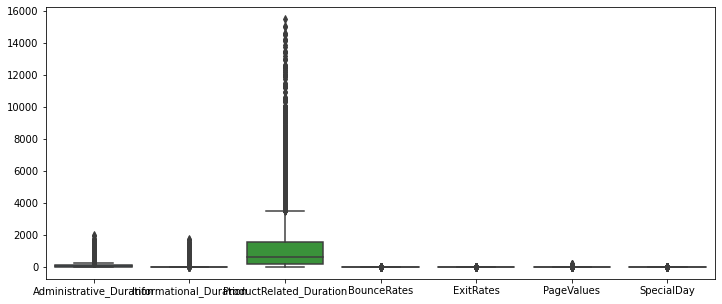

In [16]:
#ProductRelated_Duration has extreame outliers are bring down to ~14000 from ~64000
plt.figure(figsize=(12,5))
sns.boxplot(data=df[cont_var]);

# Clustering as trial n_clusters=2

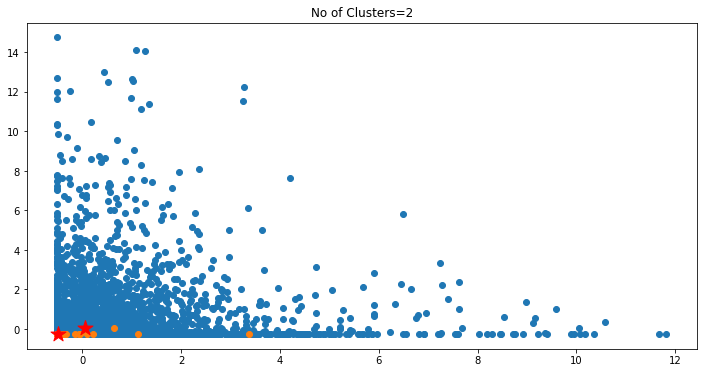

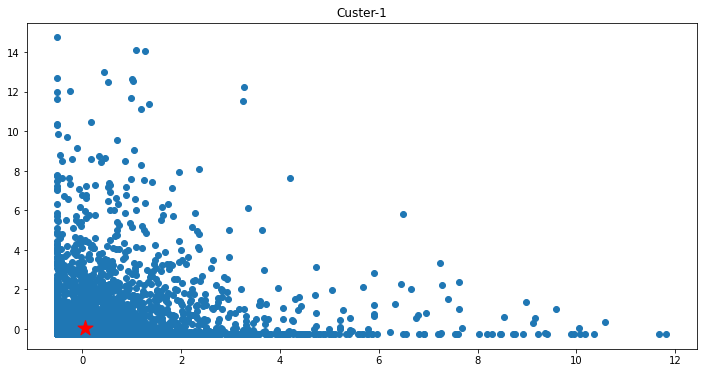

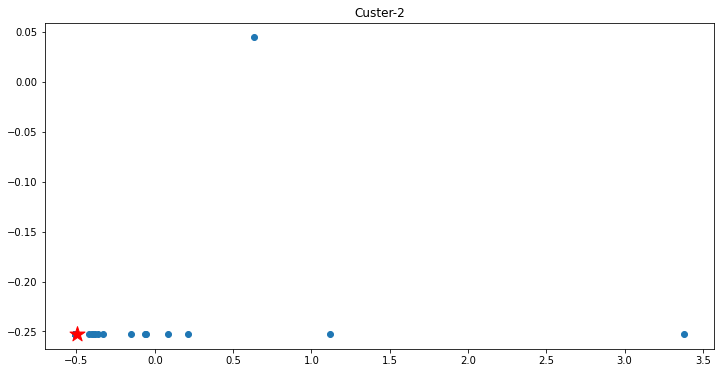

In [17]:
X=df[cont_var].values
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
cluster=KMeans(n_clusters=2,max_iter=500,tol=1e-04,algorithm='elkan', random_state=0)
km=cluster.fit(scaled_X)
labels=list(set(km.labels_))
plt.figure(figsize=(12,6))
plt.scatter(x=scaled_X[km.labels_==0,0],y=scaled_X[km.labels_==0,1]);
plt.scatter(x=scaled_X[km.labels_==1,0],y=scaled_X[km.labels_==1,1]);
plt.scatter(x=cluster.cluster_centers_[:,0],y=cluster.cluster_centers_[:,1],c='red',marker="*",label="Centroids",s=250);
plt.title("No of Clusters=2")
plt.show()
#from below graph clusters are overlapping on one another,let's print in separate graph
for i in labels:
    plt.figure(num=i,figsize=(12,6))
    plt.scatter(x=scaled_X[km.labels_==i,0],y=scaled_X[km.labels_==i,1]);
    plt.scatter(x=cluster.cluster_centers_[i,0],y=cluster.cluster_centers_[i,1],c='red',marker="*",label="Centroids",s=250);
    plt.title(f"Custer-{i+1}")

# Elbow Method for Optimal K

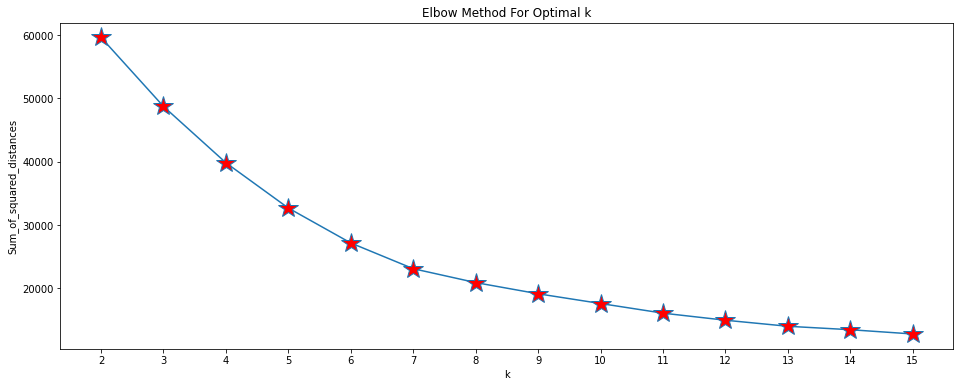

In [18]:
K=range(2,16)
sum_square_distances=list()

for i in K:
    X=df[cont_var].values
    scaler=StandardScaler()
    scaled_X=scaler.fit_transform(X)
    cluster=KMeans(n_clusters=i,max_iter=500,tol=1e-04,algorithm='elkan', random_state=0)
    km=cluster.fit(scaled_X)
    sum_square_distances.append(km.inertia_)
plt.figure(figsize=(16,6))
plt.plot(K, sum_square_distances, marker='*',markerfacecolor='red',markersize=20)
plt.xlabel('k')
plt.xticks(list(K))
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

# Silhouete Analysis for Optimal K

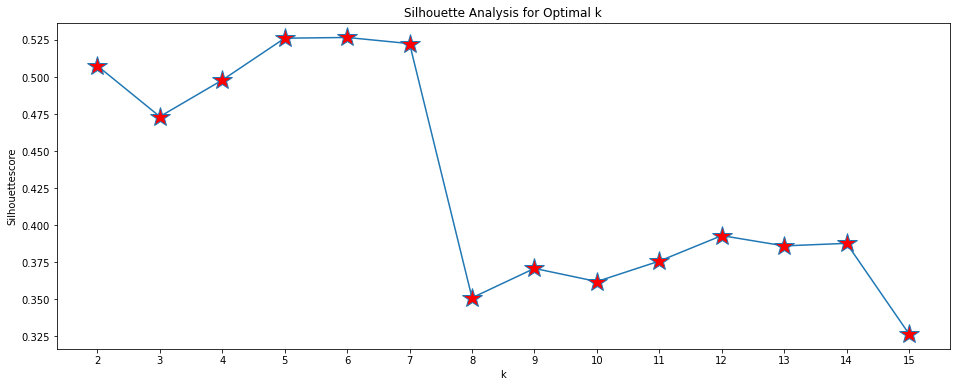

In [19]:
#from elbow method we may arrive no of clusters as 5 or 7 but not clear distiguish between 5 and 7
K=range(2,16)
silhouettescore=list()
for i in K:
    X=df[cont_var].values
    scaler=StandardScaler()
    scaled_X=scaler.fit_transform(X)
    cluster=KMeans(n_clusters=i,max_iter=500,tol=1e-04, algorithm='elkan', random_state=0)
    km=cluster.fit(scaled_X)
    silhouettescore.append(silhouette_score(scaled_X,km.labels_))  

plt.figure(figsize=(16,6))
plt.plot(K, silhouettescore, marker='*',markersize=20,markerfacecolor='red')
plt.xlabel('k')
plt.xticks(list(K))
plt.ylabel('Silhouettescore')
plt.title('Silhouette Analysis for Optimal k');

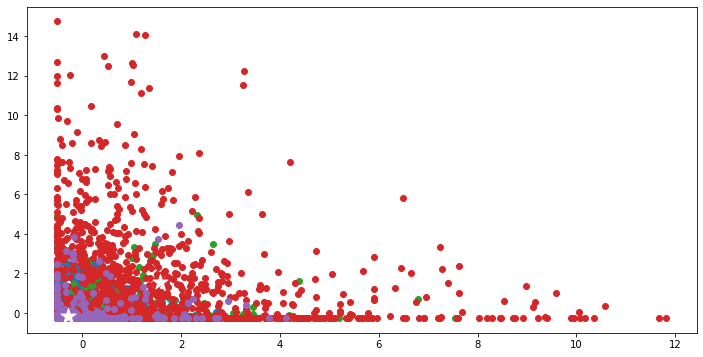

In [20]:
#from elbow method and silhoutte abalysis,arrived no of clusters=5
X=df[cont_var].values
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
cluster=KMeans(n_clusters=5,max_iter=500,tol=1e-04,algorithm='elkan', random_state=0)
km=cluster.fit(scaled_X)
labels=list(set(km.labels_))
plt.figure(figsize=(12,6))
for i in labels:
    plt.scatter(x=scaled_X[km.labels_==i,0],y=scaled_X[km.labels_==i,1]);
    plt.scatter(x=cluster.cluster_centers_[i,0],y=cluster.cluster_centers_[i,1],c='white',marker="*",label="Centroids",s=250);

# Final cluster plot with Principal Components

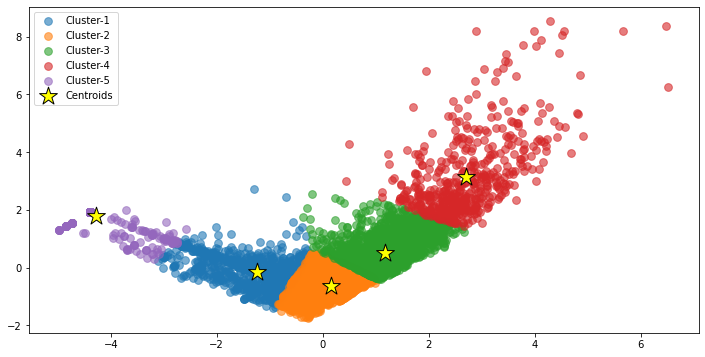

In [21]:
#pca 
pca_two_components=Pipeline(steps=[('scaling',StandardScaler()),('pca',PCA(n_components=2))]).fit_transform(df[cont_var])
#clustring model
cluster=KMeans(n_clusters=5,max_iter=500,tol=1e-04,algorithm='elkan', random_state=0)
pipeline_clustering=Pipeline(steps=[('scaling',StandardScaler()),('pca',PCA(n_components=2)),('model',cluster)])
df['cluster']=pipeline_clustering.fit_predict(df[cont_var])
#plot clusters with principal components two get distinguish visual
plt.figure(figsize=(12,6))
plt.scatter(x=pca_two_components[cluster.labels_==0,0],y=pca_two_components[cluster.labels_==0,1],label='Cluster-1',alpha=0.6,s=60,cmap='Accent');
plt.scatter(x=pca_two_components[cluster.labels_==1,0],y=pca_two_components[cluster.labels_==1,1],label='Cluster-2',alpha=0.6,s=60,cmap='Accent');
plt.scatter(x=pca_two_components[cluster.labels_==2,0],y=pca_two_components[cluster.labels_==2,1],label='Cluster-3',alpha=0.6,s=60,cmap='Accent');
plt.scatter(x=pca_two_components[cluster.labels_==3,0],y=pca_two_components[cluster.labels_==3,1],label='Cluster-4',alpha=0.6,s=60,cmap='Accent');
plt.scatter(x=pca_two_components[cluster.labels_==4,0],y=pca_two_components[cluster.labels_==4,1],label='Cluster-5',alpha=0.6,s=60,cmap='Accent');
plt.scatter(x=cluster.cluster_centers_[:,0],y=cluster.cluster_centers_[:,1],marker='*',c='yellow',edgecolor='black',s=350,label='Centroids');
plt.legend(scatterpoints=1);

# Observations

from count plot we observed that this dataset is imbalanced one, 
it may be perfectly clustered into two groups, .
if we looking for more than two clusters five is the optimum number for segmentation

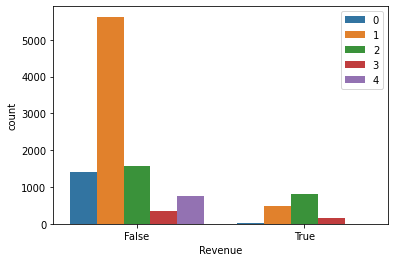

In [22]:
#just play with count plot and boxplot including cluster labels as hue
sns.countplot(x='Revenue',data=df,hue=cluster.labels_);

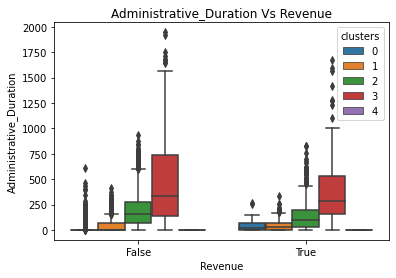

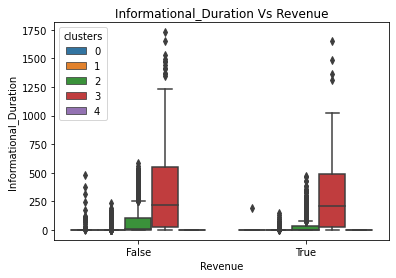

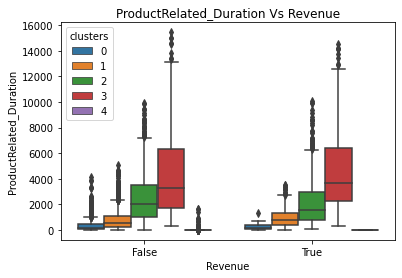

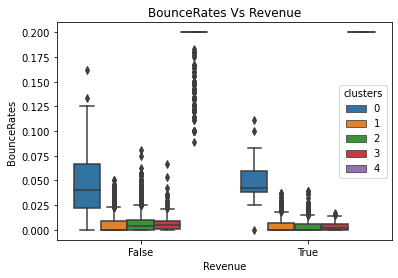

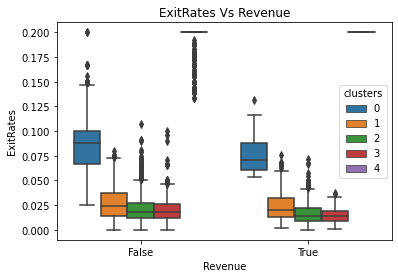

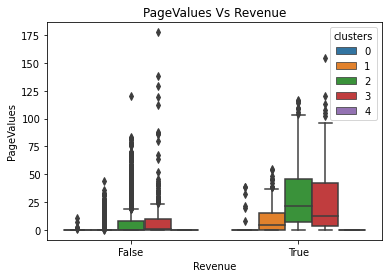

In [23]:
df['clusters']=pd.Series(cluster.labels_)
cont=cont_var[:-1]
for i,value in enumerate(cont):
    plt.figure(num=i)
    sns.boxplot(x='Revenue',
            y=value,
            hue='clusters',
            data=df);
    plt.title(f"{value} Vs Revenue")